# Linear Regression

Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

## Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
sns.set()

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**Reading in the Ecommerce Customers csv file as a DataFrame called customers.**

In [3]:
customers = pd.read_csv('Ecommerce Customers')

In [4]:
# Checking the head of the data
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
# Descriptive Statistics of the data for Numerical Columns
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
# Knowing the info about data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


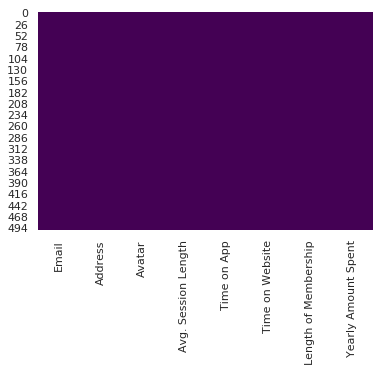

In [7]:
# Checking that the data has any missing values...
sns.heatmap(customers.isnull(), cmap='viridis', cbar=False)

#### <i>From the above heatmap, we can say that the data is not having any missin values...So we can proceed for further steps</i>

## Exploratory Data Analysis

**Let's explore the data!**

**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns**

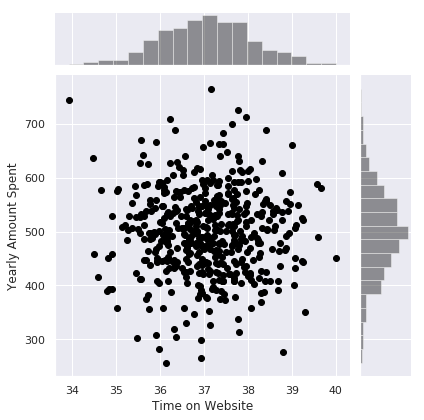

In [8]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, color='black')

**Jointplot with the Time on App column and Yearly Amount Spent**

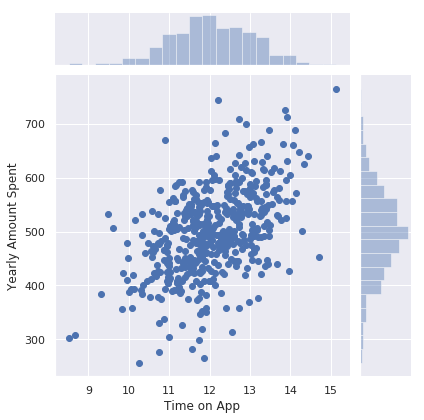

In [9]:
sns.jointplot('Time on App','Yearly Amount Spent',customers)

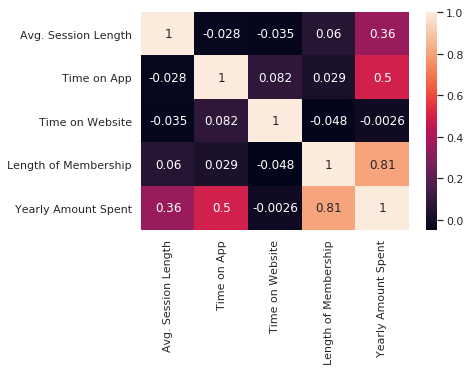

In [11]:
# just checking the correlation of all features
sns.heatmap(customers.corr(), cbar=True, annot=True)

In [12]:
# Based on above correlation map, we can say that (Avg. Session Length, Yearly Amount  Spent), (Yearly Amount
# Spent,Length of Membership), (Time on App, Yearly Amount Spent) have good correlation

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

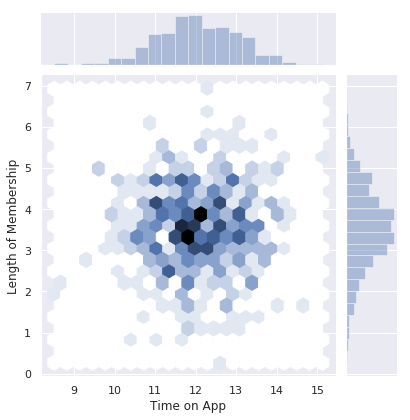

In [13]:
sns.jointplot('Time on App','Length of Membership',customers,kind='hex')

**Let's explore these types of relationships across the entire data set**

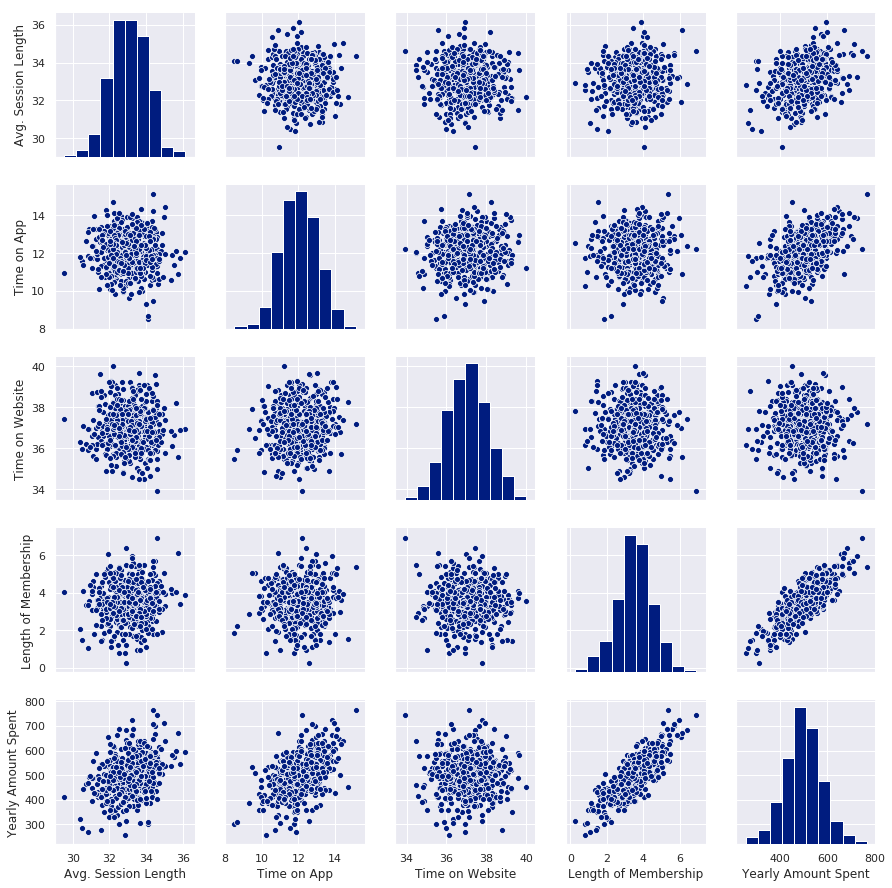

In [14]:
sns.pairplot(customers, palette=sns.set_palette('dark'))

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

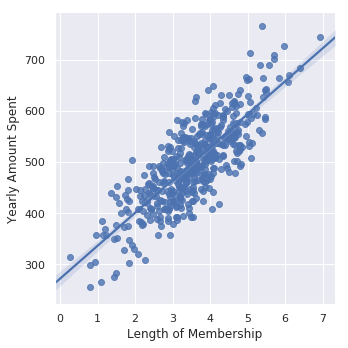

In [15]:
sns.lmplot('Length of Membership','Yearly Amount Spent', customers, palette=sns.set_palette('deep'))

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [16]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [17]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [18]:
y = customers['Yearly Amount Spent']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

In [21]:
# Checking the shape of X_Train and y_trainX
X_train.shape

(350, 4)

In [22]:
y_train.shape

(350,)

## Training the Model

Now its time to train our model on our training data!

**Import LinearRegression from sklearn.linear_model**

In [23]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [24]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [25]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Print out the coefficients of the model**

In [26]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [27]:
xx = X_train

In [28]:
y_new = 25.98154972*X_train['Avg. Session Length'] + 38.59015875*X_train['Time on App'] + 0.19040528*X_train['Time on Website'] + 61.27909654*X_train['Length of Membership']

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [29]:
predictions = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

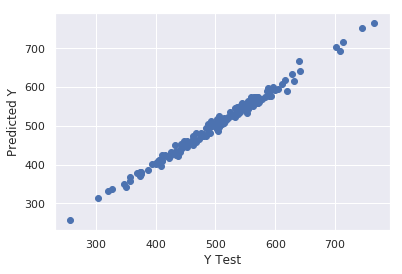

In [30]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [31]:
print('MAE:',sklearn.metrics.mean_absolute_error(y_test,predictions))
print('MSE:',sklearn.metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(sklearn.metrics.mean_squared_error(y_test,predictions)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


In [33]:
sklearn.metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

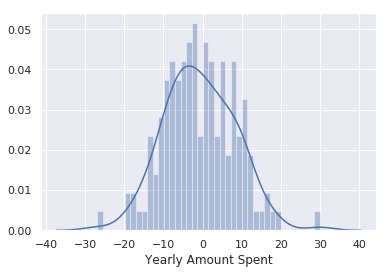

In [34]:
sns.distplot(y_test-predictions, bins=40)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.